# LUFlow Network Intrusion Detection Data Set

A novel data set which promotes the analysis and detection of emerging threats

#### This is an exploratory analysis and a Classification model for predicting which features play a major role in the network traffic label (benign or malicious) of the dataset above.

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load data
df = pd.read_csv('2022.06.13.csv')

df.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,0.0,0,0,786,29627.0,0.0,1,0,6,786,47613.0,1655080010205377,1655080010205377,0.000000,malicious,0.000000
1,0.0,8,8,786,NaN,3.0,1,1,1,786,NaN,1655080009310901,1655080009310772,47.999996,malicious,0.000129
2,0.0,8,8,786,NaN,3.0,1,1,1,786,NaN,1655080013801886,1655080013801783,47.999996,malicious,0.000103
3,0.0,8,8,786,NaN,3.0,1,1,1,786,NaN,1655080014067781,1655080014067648,47.999996,malicious,0.000133
4,0.0,8,8,786,NaN,3.0,1,1,1,786,NaN,1655080009413572,1655080009413455,47.999996,malicious,0.000117


# Exploration

In [14]:
# Checking for null value percentage
(df.isnull().sum() / len(df)) * 100

avg_ipt           0.000000
bytes_in          0.000000
bytes_out         0.000000
dest_ip           0.000000
dest_port        10.680722
entropy           0.000000
num_pkts_out      0.000000
num_pkts_in       0.000000
proto             0.000000
src_ip            0.000000
src_port         10.680722
time_end          0.000000
time_start        0.000000
total_entropy     0.000000
label             0.000000
duration          0.000000
dtype: float64

In [15]:
# Dropping NaN rows
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403833 entries, 0 to 452122
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   avg_ipt        403833 non-null  float64
 1   bytes_in       403833 non-null  int64  
 2   bytes_out      403833 non-null  int64  
 3   dest_ip        403833 non-null  int64  
 4   dest_port      403833 non-null  float64
 5   entropy        403833 non-null  float64
 6   num_pkts_out   403833 non-null  int64  
 7   num_pkts_in    403833 non-null  int64  
 8   proto          403833 non-null  int64  
 9   src_ip         403833 non-null  int64  
 10  src_port       403833 non-null  float64
 11  time_end       403833 non-null  int64  
 12  time_start     403833 non-null  int64  
 13  total_entropy  403833 non-null  float64
 14  label          403833 non-null  object 
 15  duration       403833 non-null  float64
dtypes: float64(6), int64(9), object(1)
memory usage: 52.4+ MB


In [16]:
# Shape information
df.shape

(403833, 16)

In [17]:
# Conversion of port numbers to int
df['dest_port'] = df['dest_port'].astype('int64')
df['src_port'] = df['src_port'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403833 entries, 0 to 452122
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   avg_ipt        403833 non-null  float64
 1   bytes_in       403833 non-null  int64  
 2   bytes_out      403833 non-null  int64  
 3   dest_ip        403833 non-null  int64  
 4   dest_port      403833 non-null  int64  
 5   entropy        403833 non-null  float64
 6   num_pkts_out   403833 non-null  int64  
 7   num_pkts_in    403833 non-null  int64  
 8   proto          403833 non-null  int64  
 9   src_ip         403833 non-null  int64  
 10  src_port       403833 non-null  int64  
 11  time_end       403833 non-null  int64  
 12  time_start     403833 non-null  int64  
 13  total_entropy  403833 non-null  float64
 14  label          403833 non-null  object 
 15  duration       403833 non-null  float64
dtypes: float64(4), int64(11), object(1)
memory usage: 52.4+ MB


### Visualization of `label`

In [18]:
# Checking value counts of the labels
df['label'].value_counts()

benign       219916
outlier      105801
malicious     78116
Name: label, dtype: int64

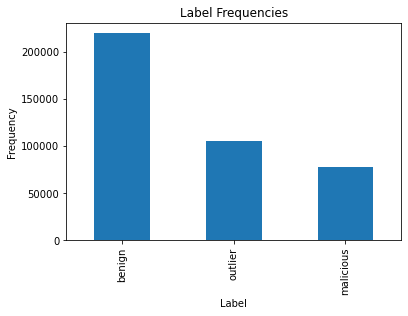

In [21]:
# Showing of labels value count plot
df['label'].value_counts().plot(kind = 'bar')

plt.title('Label Frequencies')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

### Visualization of `entropy` and `total_entropy`

***Entropy***, in cyber security, is a measure of the randomness or diversity of a data-generating function. Data with full entropy is completely random and no meaningful patterns can be found.

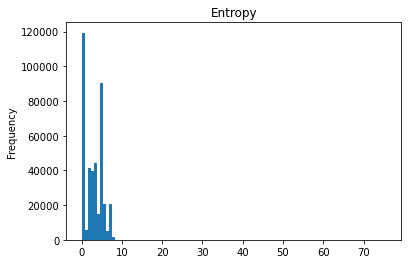

In [22]:
# Entropy in bits per byte of the data fields within the flow
df['entropy'].plot(kind='hist', bins=100)
plt.title('Entropy')
plt.show()

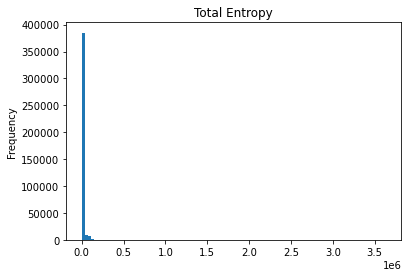

In [23]:
# Total Entropy in bits per byte of the data fields within the flow
df['total_entropy'].plot(kind='hist', bins=100)
plt.title('Total Entropy')
plt.show()

The histogram does not show a clear visuals. Let's plot the non-zero logarithm of the `total_entropy`

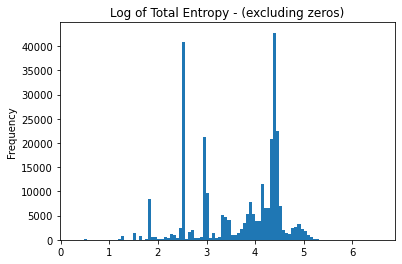

In [24]:
# A look at non-zeroes only
total_entropy_non_zeros = df['total_entropy'][df['total_entropy']>0]
# show log plot
plt.hist(np.log10(total_entropy_non_zeros),100)
plt.ylabel('Frequency')
plt.title('Log of Total Entropy - (excluding zeros)')
plt.show()

### Visualization of `duration` of bytes flow

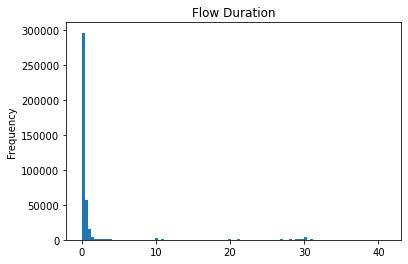

In [25]:
# Flow duration of the data
df['duration'].plot(kind='hist', bins=100)
plt.title('Flow Duration')
plt.show()

The histogram does not show a clear visuals. Let's plot the non-zero logarithm of the `duration`

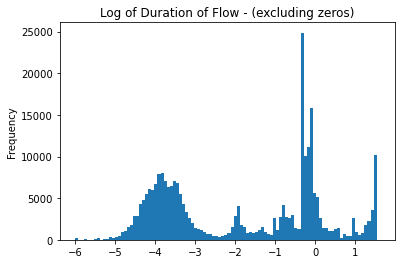

In [26]:
# A look at non-zeroes only
duration_non_zeros = df['duration'][df['duration']>0]
# show log plot
plt.hist(np.log10(duration_non_zeros),100)
plt.ylabel('Frequency')
plt.title('Log of Duration of Flow - (excluding zeros)')
plt.show()

### Start Time and End Term Scatter Plot

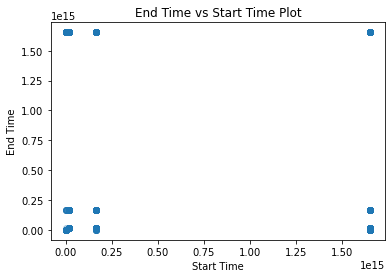

In [27]:
# Scatter plot of start and end time
plt.scatter(df['time_start'], df['time_end'], alpha=0.1)
plt.xlabel('Start Time')
plt.ylabel('End Time')
plt.title('End Time vs Start Time Plot')
plt.show()

### Bytes flow Scatter Plot

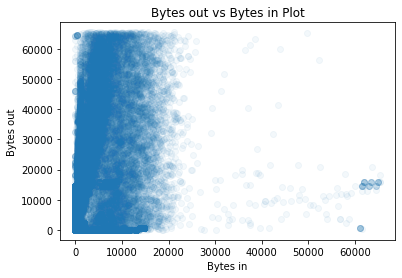

In [30]:
# Scatter plot of bytes in and out
plt.scatter(df['bytes_in'], df['bytes_out'], alpha=0.05)
plt.xlabel('Bytes in')
plt.ylabel('Bytes out')
plt.title('Bytes out vs Bytes in Plot')
plt.show()

### Packet source and destination frequency plot

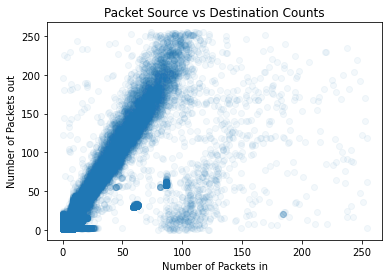

In [31]:
# Scatter plot of packets from source and destination (in / out)
plt.scatter(df['num_pkts_in'], df['num_pkts_out'], alpha=0.05)
plt.xlabel('Number of Packets in')
plt.ylabel('Number of Packets out')
plt.title('Packet Source vs Destination Counts')
plt.show()

### Protocols plot

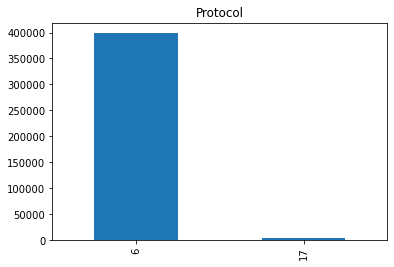

In [32]:
# Protocol number associated with the flow; e. g. TCP is 6
df['proto'].value_counts().plot(kind='bar')
plt.title('Protocol')
plt.show()

In [33]:
# Checking the impact of protocol on target
pd.crosstab(df['proto'], df['label'])

label,benign,malicious,outlier
proto,,,
6,218829,77578,102740
17,1087,538,3061


In [42]:
# Checking Source IP Address
df['src_ip'].unique()

array([786], dtype=int64)

In [46]:
# Checking Destination IP Address
df['dest_ip'].unique()

array([786], dtype=int64)

In [41]:
# Most frequent IP pairs
df['IP_pair'] = df['src_ip'].astype(str) + ' >> ' + df['dest_ip'].astype(str)
df['IP_pair'].unique()

array(['786 >> 786'], dtype=object)

### Frequency of Source and Destination Ports 

In [49]:
# Most frequent Port pairs
df['port_pair'] = df['src_port'].astype(str) + ' >> ' + df['dest_port'].astype(str)
df['port_pair'].value_counts()[0:10]

45318 >> 9200    19568
45332 >> 9200    19389
45330 >> 9200    19375
45322 >> 9200    18542
45334 >> 9200    18325
45324 >> 9200    17848
45326 >> 9200    13030
45328 >> 9200    12843
9200 >> 45324     5831
9200 >> 45332     5707
Name: port_pair, dtype: int64

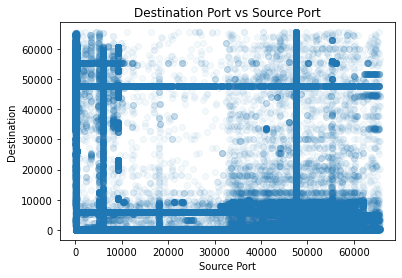

In [50]:
# Destination port vs source port
plt.scatter(df['src_port'], df['dest_port'], alpha=0.05)
plt.xlabel('Source Port')
plt.ylabel('Destination')
plt.title('Destination Port vs Source Port')
plt.show()

### Correlation plot of `numeric` datatypes

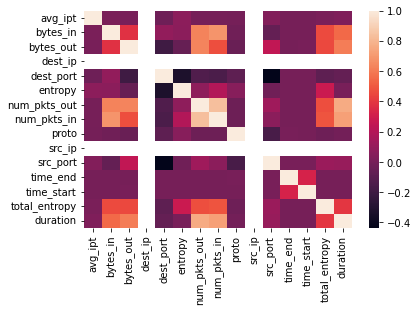

In [56]:
sns.heatmap(df.corr());

### Creating a `malicious` column from the `label` column for Classification. 

In [58]:
# Showing unique values in `label`
df['label'].unique()

array(['malicious', 'benign', 'outlier'], dtype=object)

### All packets with `benign` labels should be labeled as `0` (not malicious) and the others as `1` (malicious)

In [64]:
# Creating and assigning a `malicious` column
df['malicious'] = df['label'].apply(lambda x: 0 if x == 'benign' else 1)

df['malicious'].unique()

array([1, 0], dtype=int64)

In [65]:
# Showing value counts
df['malicious'].value_counts()

0    219916
1    183917
Name: malicious, dtype: int64

In [69]:
# Model libraries
from category_encoders import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted

# Split

In [70]:
# Showing columns
df.columns

Index(['avg_ipt', 'bytes_in', 'bytes_out', 'dest_ip', 'dest_port', 'entropy',
       'num_pkts_out', 'num_pkts_in', 'proto', 'src_ip', 'src_port',
       'time_end', 'time_start', 'total_entropy', 'label', 'duration',
       'IP_pair', 'port_pair', 'malicious'],
      dtype='object')

In [72]:
# Spliting data
target = 'malicious'
X = df.drop(columns = ['label', 'IP_pair', 'port_pair', 'malicious', 'time_end','time_start'])
y = df[target]

X.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,total_entropy,duration
0,0.000000,0,0,786,29627,0.000000,1,0,6,786,47613,0.00,0.000000
5,0.000000,0,0,786,1803,0.000000,1,0,6,786,47613,0.00,0.000000
6,167.709091,1680,3028,786,9200,8.974504,58,21,6,786,52678,42251.97,9.233032
8,0.000000,0,0,786,45429,0.000000,1,0,6,786,47613,0.00,0.000000
10,412.791667,7306,59008,786,9200,1.204369,74,42,6,786,52672,79866.50,31.382310


Divide the data (X and y) into training and validation sets using a randomized train-test split. The test set should be 20% of total data.

In [81]:
# Spliting training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (323066, 13)
y_train shape: (323066,)
X_test shape: (80767, 13)
y_test shape: (80767,)


In [74]:
# Split traiing and validation data
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.2, random_state = 42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_val.shape)
print("y_test shape:", y_val.shape)

X_train shape: (323066, 13)
y_train shape: (323066,)
X_test shape: (80767, 13)
y_test shape: (80767,)


# Build Model

## Model Baseline

In [75]:
# Baseline Accuracy
acc_baseline = y_train.value_counts(normalize = True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.54


## Iterate

Create a `Classification` Model

In [77]:
# Build Model
cl_model = DecisionTreeClassifier(max_depth = 10, random_state = 42)
# Fit model to training data
cl_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

Create a range of possible values for `max_depth` hyperparameter of the `cl_model's` DecisionTreeClassifier. `depth_hyperparams` should range from `1` to `50` by steps of `2`.

In [78]:
# Hyperparameter values 
depth_hyperparams = range(1, 50, 2)

# Create empty lists for training and validation accuracy scores
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model = DecisionTreeClassifier(max_depth = d, random_state = 42)
    # Fit model to training data
    test_model.fit(X_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train, y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(X_val, y_val))

print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.854122687005132, 0.9538732023796995, 0.991023506032823]
Validation Accuracy Scores: [0.8526502160535863, 0.9540530167023661, 0.9907759357163198]


Create a visualization with two lines. The first line should plot the `training_acc` values as a function of `depth_hyperparams`, and the second should plot `validation_acc` as a function of `depth_hyperparams`.

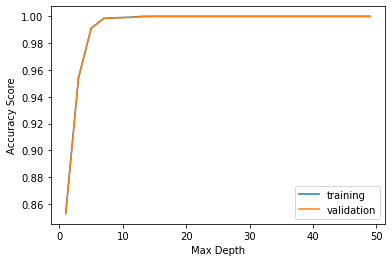

In [79]:
# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams, training_acc, label = "training")
plt.plot(depth_hyperparams, validation_acc, label = "validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.legend();

In [83]:
# Test accuracy score
test_acc = cl_model.score(X_val, y_val)
print("Test Accuracy:", round(test_acc, 2))

Test Accuracy: 1.0


# Communication

Assign the `feature` names and `importances` of the `cl_model` to the variables below. Access the `features`, from the column names in the training set and the importances, fron the `feature_importances_` attribute of the model's `DecisionTreeClassifier`.

In [85]:
# Extracting features and importances
features = X_train.columns
importances = cl_model.feature_importances_

print("Features:", features[:3])
print("Importances:", importances[:3])

Features: Index(['avg_ipt', 'bytes_in', 'bytes_out'], dtype='object')
Importances: [0.00044328 0.00079583 0.00086119]


Create a pandas Series named `feat_imp`, where the `index` is `features` and the values are the importances. The `Series` should be sorted from `largest` to `smallest` importance.

In [86]:
# Creting feat_imp series
feat_imp = pd.Series(
    importances,
    index = features
).sort_values()
feat_imp.head()

dest_ip         0.000000
src_ip          0.000000
num_pkts_out    0.000035
proto           0.000360
avg_ipt         0.000443
dtype: float64

Create a horizontal bar chart with all the features in `feat_imp`.

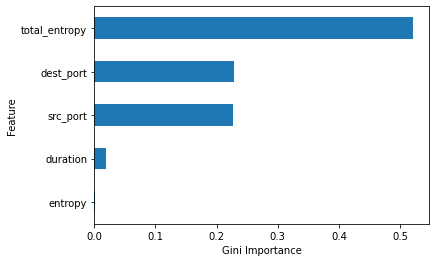

In [89]:
# Create horizontal bar chart
feat_imp.tail().plot(kind = "barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature");

# References

1. Network Intrusion Detection - Demo (https://www.kaggle.com/code/docxian/network-intrusion-detection-demo)

2. LUFlow Network Intrusion Detection Data Set (https://www.kaggle.com/datasets/mryanm/luflow-network-intrusion-detection-data-set)